<h1>Extracting and Visualizing Stock Data</h1>



#Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
#Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
#Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
#Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
#Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
#Question 7 - Sharing your Assignment Notebook - 2 Points


In [5]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

##  Use yfinance to Extract Stock Data


In [11]:
tesla=yf.Ticker("TSLA")
print(tesla.info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


In [10]:
tesla_data = tesla.history(period="max")
print(tesla_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-09-21  257.850006  260.859985  254.210007  255.699997  119531000   
2023-09-22  257.399994  257.790009  244.479996  244.880005  127024300   
2023-09-25  243.380005  247.100006  238.309998  246.990005  104636600   
2023-09-26  242.979996  249.550003  241.660004  244.119995  101993600   
2023-09-27  244.259995  245.330002  234.580002  240.500000  136354700   

            Dividends  Stock Splits  
Date        

In [12]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


##  Use Webscraping to Extract Tesla Revenue Data


In [13]:
import requests

# Make a get request to get the webpage
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

# Save the text of the response as a variable named html_data
html_data = response.text


In [14]:
# Parse the html data
soup = BeautifulSoup(html_data, 'html.parser')

In [21]:
# Find the table in the HTML data
table = soup.find('table')

# Read the table into a DataFrame
tesla_revenue = pd.read_html(str(table), header=0)[0]

# Rename the columns
tesla_revenue.columns = ['Date', 'Revenue']

In [22]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [23]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [24]:
# Display the last five rows of the DataFrame
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


### Use yfinance to Extract Stock Data of GameStop


In [25]:
#creating ticker object for gamestop
GameStop=yf.Ticker("GME")

In [28]:
gme_data=GameStop.history(period="max")
print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615921   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-09-21  17.280001  17.320000  16.650000  17.020000   2910700        0.0   
2023-09-22  17.180000  17.350000  17.000000  17.180000   2100300        0.0   
2023-09-25  17.000000  17.719999  16.850000  17.670000   2181200        0.0   
2023-09-26  17.379999  17.820000  16.780001  16.780001   2726800        0.0   
2023-09-27  16.870001  17.260000  16.809999  17.1500

In [29]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Use Webscraping to Extract GME Revenue Data


In [33]:
import requests

# Make a get request to get the webpage
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

# Save the text of the response as a variable named html_data
html_data = response.text


In [34]:
# Parse the html data
soup = BeautifulSoup(html_data, 'html.parser')


In [36]:
# Find the table in the HTML data
table = soup.find('table')

# Read the table into a DataFrame
gme_revenue = pd.read_html(str(table), header=0)[0]

# Rename the columns
gme_revenue.columns = ['Date', 'Revenue']

# To remove dollar and comma sign
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [37]:
# Display the last five rows of the DataFrame
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


##  Plot Tesla Stock Graph


In [42]:
!pip install matplotlib

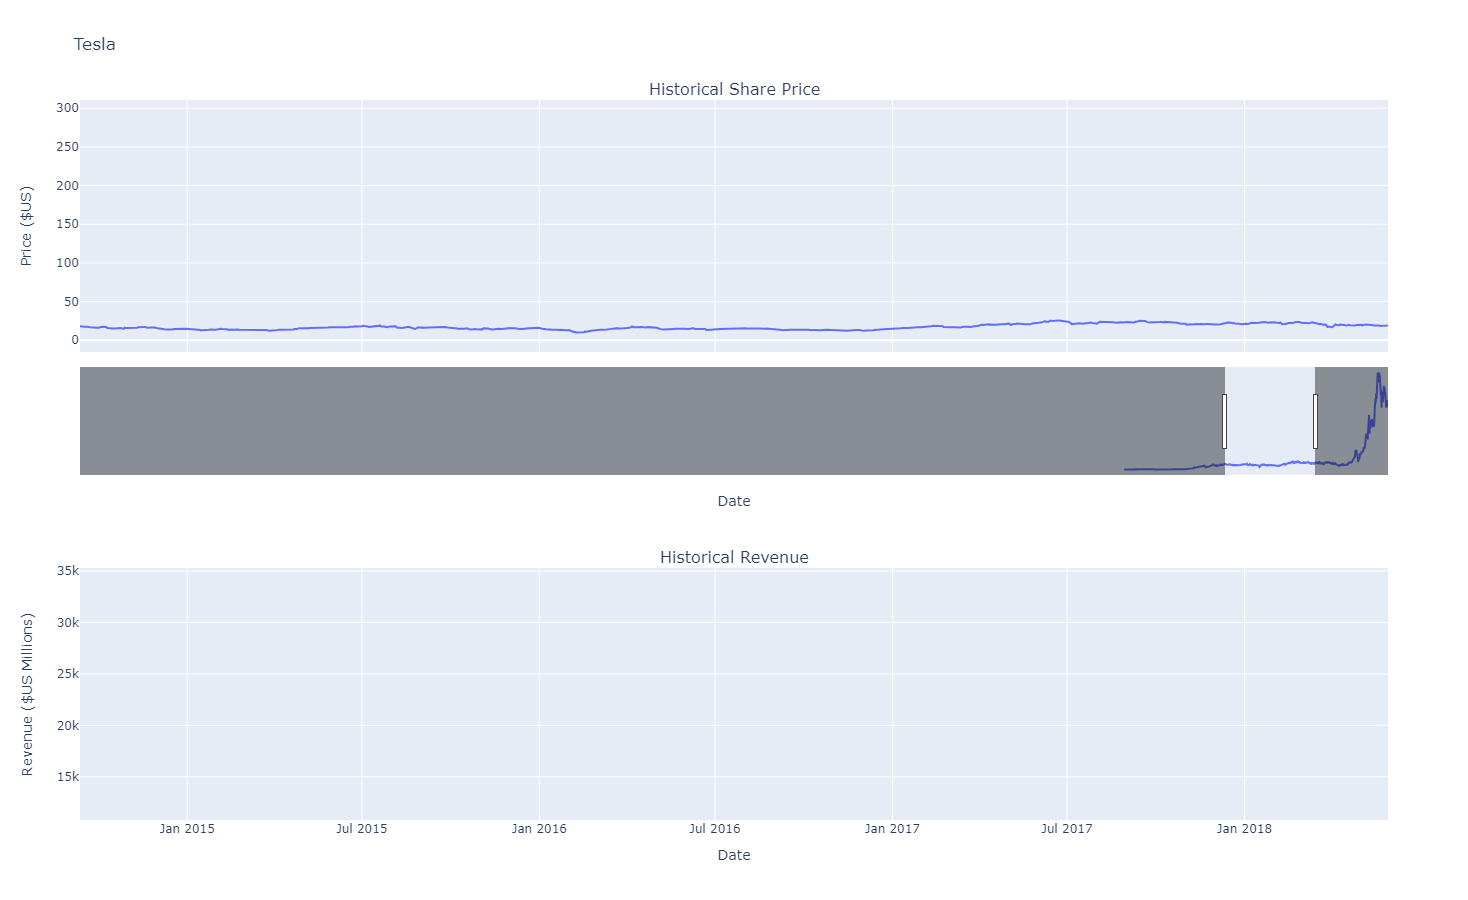

In [47]:
# Convert the 'Date' column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Now you can do the comparison
tesla_revenue_specific = tesla_revenue[tesla_revenue.Date <= '2021-04-30']

make_graph(tesla_data,tesla_revenue,'Tesla')

## Plot GameStop Stock Graph


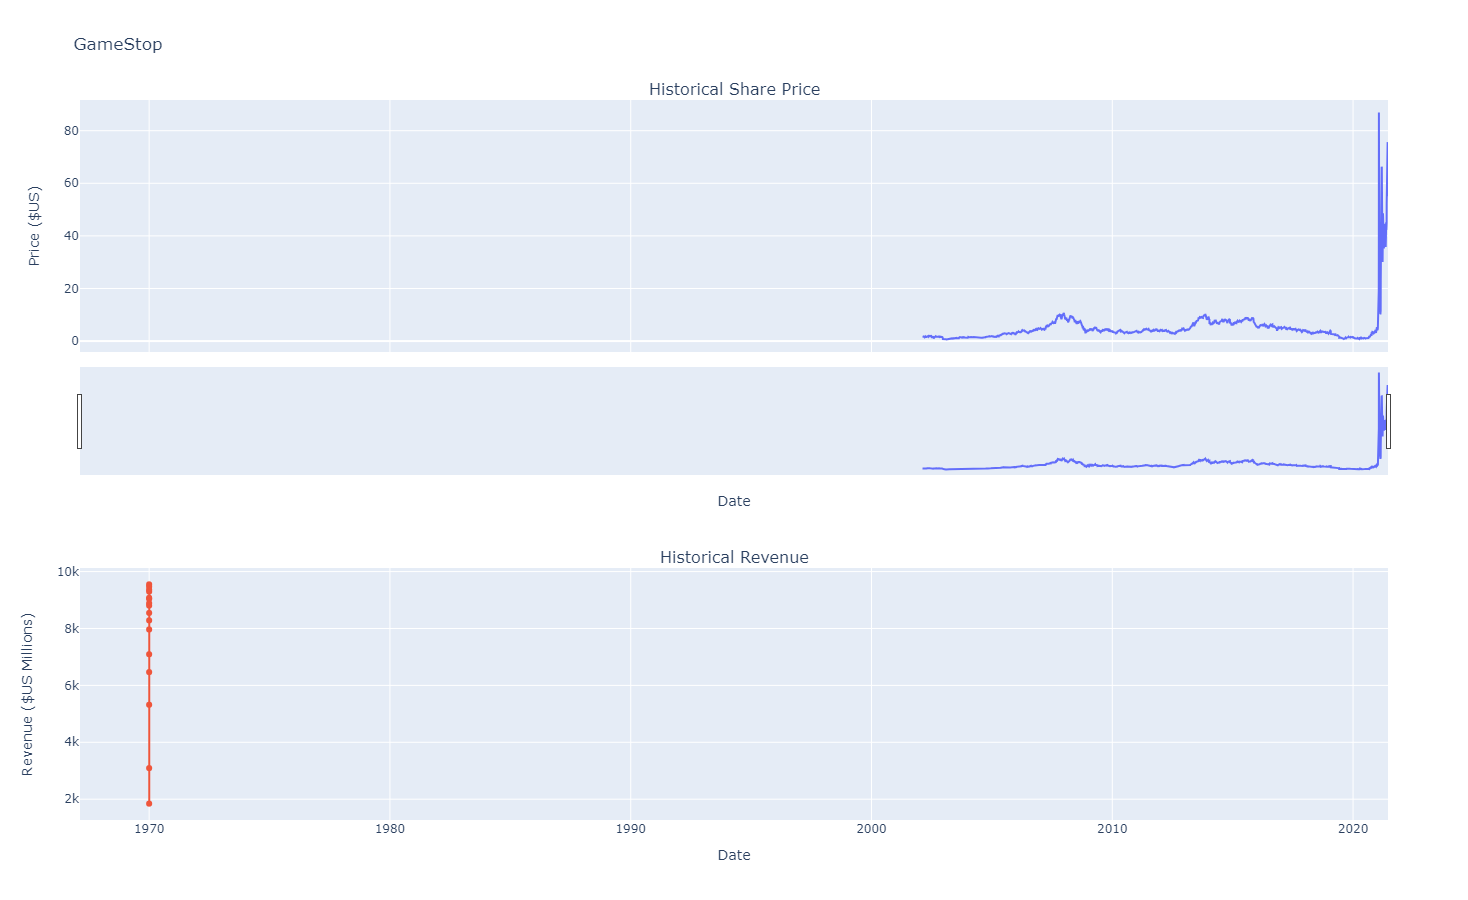

In [49]:
# Convert the 'Date' column to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Now you can do the comparison
gme_revenue_specific = gme_revenue[gme_revenue.Date <= '2021-04-30']

make_graph(gme_data,gme_revenue,'GameStop')